In [34]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [35]:
from os import listdir
from os.path import isdir, isfile, join

### Wave file load

In [36]:
datapath = 'dataset'
data_files = [join(datapath, file) for file in listdir('dataset') if '.wav' in file]
print('# of data files :', len(data_files))
data_files.sort()
for data_file in data_files[:10]:
    print(data_file)

# of data files : 1000
dataset/KsponSpeech_000001.wav
dataset/KsponSpeech_000002.wav
dataset/KsponSpeech_000003.wav
dataset/KsponSpeech_000004.wav
dataset/KsponSpeech_000005.wav
dataset/KsponSpeech_000006.wav
dataset/KsponSpeech_000007.wav
dataset/KsponSpeech_000008.wav
dataset/KsponSpeech_000009.wav
dataset/KsponSpeech_000010.wav


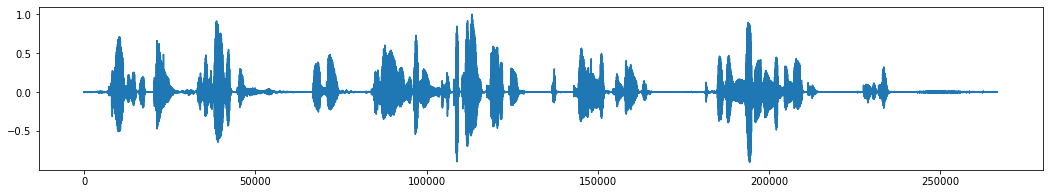

In [42]:
# 파일 로드
wav, sampling_rate = librosa.core.load(data_files[6])
# normalizing
wav /= max(abs(wav))

plt.figure(figsize=[18, 3])
plt.plot(wav)
plt.show()

# 22050 hz 음성파일을 11025 hz로 재생하면 어떤소리가 날까요?
# 1. 소리가 높게난다.
# 2. 소리가 낮게난다.
# 3. 소리 길이가 늘어난다.
# 4. 소리 길이가 짧아진다.
import IPython.display as ipd
ipd.Audio(wav, rate=22050)

### Spectrogram

In [43]:
# spectrogram과 mel-spectrogram 값을 normalizing하기 위한 함수
def normalize(S, eps=1e-5):
    return np.log10(S + 1e-5)

(1025, 521)


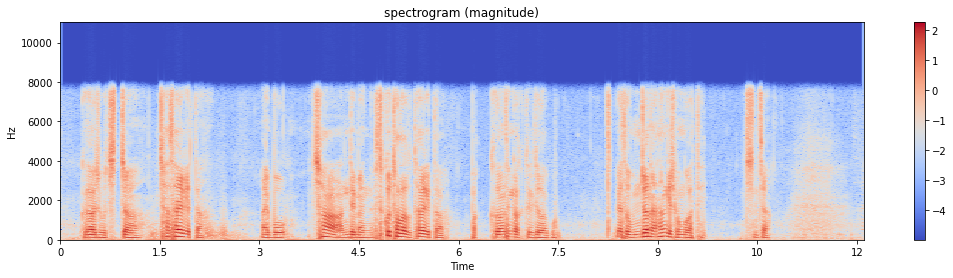

In [53]:
# spectrogram 구하기
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
print(spec.shape)
spec = np.abs(spec)

plt.figure(figsize=[18, 4])
plt.title('spectrogram (magnitude)')
librosa.display.specshow(normalize(spec), y_axis='linear', x_axis='time', hop_length=512)
plt.colorbar()
plt.show()

import IPython.display as ipd
ipd.Audio(wav, rate=22050)

### complex spectrogram 값  보기  

In [54]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
print(spec.shape)
print(spec)

(1025, 521)
[[-4.2559522e-01+0.0000000e+00j -4.2769206e-01+0.0000000e+00j
  -1.9599861e-01+0.0000000e+00j ... -8.9714833e-02+0.0000000e+00j
  -6.2983967e-02+0.0000000e+00j  1.7508967e-01+0.0000000e+00j]
 [ 2.8590479e-01+6.0173221e-18j  1.8661451e-01-1.2681613e-02j
   2.0248707e-01+2.5076854e-01j ...  1.8566711e-01-2.3435520e-01j
   8.2006291e-02+2.5280893e-01j -2.3692697e-01-1.9026045e-02j]
 [-1.9010776e-01-9.3461946e-18j  1.8988807e-01+1.2851416e-01j
  -1.9680640e-01-2.2027557e-01j ... -3.0473137e-01+4.6374884e-02j
  -1.3487148e-01-9.6137002e-02j  2.8145549e-01+9.2201337e-02j]
 ...
 [ 1.6733009e-04+1.3230982e-18j -8.3660969e-05+3.2974759e-10j
  -8.8388026e-09+2.6332390e-09j ... -6.1299059e-09-6.4533837e-11j
   1.4528955e-05-5.3990161e-06j -1.0832805e-03+4.0265988e-04j]
 [-1.6732498e-04-1.3552527e-18j  4.6580477e-09+8.3668783e-05j
   1.0657438e-08+3.1198599e-10j ...  6.9375057e-09+9.5507700e-09j
   1.5265734e-05-2.7433025e-06j -2.0455124e-04-1.1374424e-03j]
 [ 1.6732013e-04+0.0000000e+

### magnitude spectrogram 값  보기  

In [55]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
spec = np.abs(spec)
print(spec.shape)
print(spec)

(1025, 521)
[[4.2559522e-01 4.2769206e-01 1.9599861e-01 ... 8.9714833e-02
  6.2983967e-02 1.7508967e-01]
 [2.8590479e-01 1.8704492e-01 3.2231331e-01 ... 2.9898936e-01
  2.6577696e-01 2.3768967e-01]
 [1.9010776e-01 2.2928883e-01 2.9538801e-01 ... 3.0823991e-01
  1.6562802e-01 2.9617271e-01]
 ...
 [1.6733009e-04 8.3660969e-05 9.2227097e-09 ... 6.1302456e-09
  1.5499674e-05 1.1556953e-03]
 [1.6732498e-04 8.3668783e-05 1.0662003e-08 ... 1.1804499e-08
  1.5510266e-05 1.1556888e-03]
 [1.6732013e-04 8.3651212e-05 1.8406281e-08 ... 6.3700738e-09
  1.5485528e-05 1.1556722e-03]]


### n_fft와 hop_length 바꿔보기

In [56]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=256)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=1024, hop_length=256)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=4096, hop_length=256)
print(spec.shape)

(1025, 1042)
(513, 1042)
(2049, 1042)


In [57]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=256)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
print(spec.shape)

spec = librosa.core.stft(wav, n_fft=2048, hop_length=1024)
print(spec.shape)

(1025, 1042)
(1025, 521)
(1025, 261)


### Mel-spectrogram

mel matrix shape : (80, 1025)


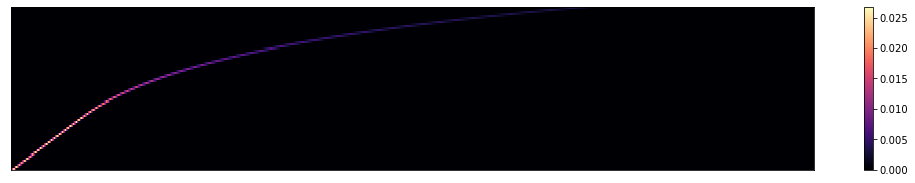

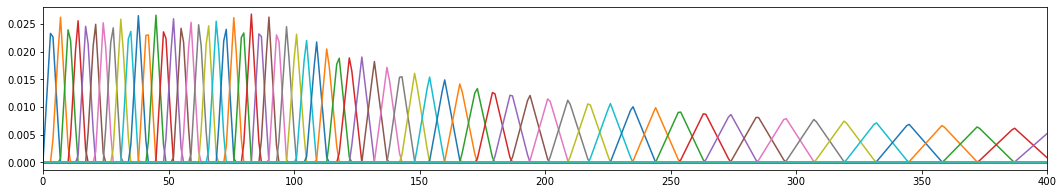

In [58]:
# mel-spectrogram을 만들기 위한 matrix 구하기
mel_matrix = librosa.filters.mel(sr=22050, n_fft=2048, fmin=0.0, fmax=8000, n_mels=80)
print('mel matrix shape :', mel_matrix.shape)

# mel matrix 시각화1
plt.figure(figsize=[18, 3])
librosa.display.specshow(mel_matrix)
plt.colorbar()
plt.show()

# mel matrix 시각화2
plt.figure(figsize=[18, 3])
for i in range(80):
    plt.plot(mel_matrix[i])
    plt.xlim([0, 400])
plt.show()

### Mel-spectrogram 구하기

mel-spectrogram shape: (80, 521)


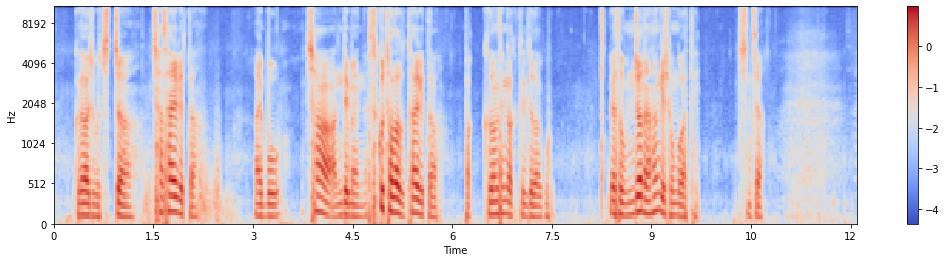

In [59]:
spec = librosa.core.stft(wav, n_fft=2048, hop_length=512)
spec = np.abs(spec)

# spec : (1025, 416)
# mel_matrix : (80, 1025)

# spectrogram에 mel-matrix 적용
# mel : (80, 416)
mel = mel_matrix @ spec
print('mel-spectrogram shape:', mel.shape)

# mel-spectrogram 시각화
plt.figure(figsize=[18, 4])
librosa.display.specshow(normalize(mel), y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()